Cell 1: Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Cell 2: Load and process sentiment data

In [6]:
sentiment_df = pd.read_csv('../data/reddit_crypto_sentiment.csv')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
daily_sentiment = sentiment_df.groupby('date')['sentiment'].mean()

Cell 3: Load and process BTC price

In [7]:
price_df = pd.read_csv('../data/bitcoin_price_data.csv')
price_df['date'] = pd.to_datetime(price_df['date']).dt.date
price_df.set_index('date', inplace=True)

Cell 4: Merge

In [8]:
merged_df = pd.DataFrame(daily_sentiment)
merged_df = merged_df.join(price_df, how='inner')
print(merged_df.head())

            sentiment         price
date                               
2025-03-15   0.421500  83971.709161
2025-03-16   0.181963  84391.690876
2025-03-17   0.090105  82610.617503
2025-03-17   0.090105  84216.936368


Cell 5: Plot

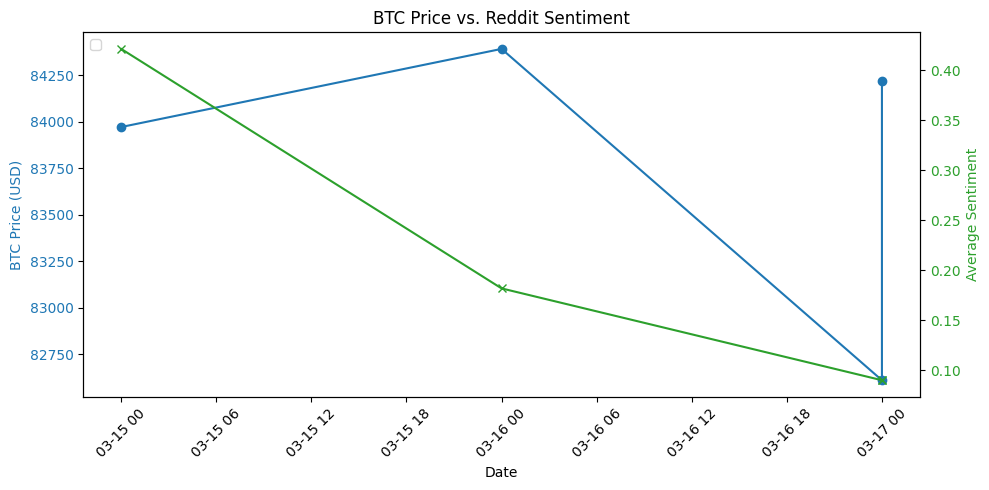

In [10]:
fig, ax1 = plt.subplots(figsize=(10, 5))

plt.xticks(rotation=45)
ax1.legend(['BTC Price'], loc='upper left')
ax2.legend(['Sentiment'], loc='upper right')

ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price (USD)', color='tab:blue')
ax1.plot(merged_df.index, merged_df['price'], color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Sentiment', color='tab:green')
ax2.plot(merged_df.index, merged_df['sentiment'], color='tab:green', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('BTC Price vs. Reddit Sentiment')
fig.tight_layout()
plt.show()